# XGFix

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

import numpy as np
import os
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix
import sys

# local functions
%load_ext autoreload
%autoreload 2

from phasing import *
from XGFix import *

sys.path.append('..')
from XGMIX import XGMIX, load_model
from postprocess import read_vcf, get_samples_from_msp_df
from visualization import plot_cm, plot_chm
from preprocess import load_np_data, window_reshape

sys.path.append('../Admixture')
from utils import sample_map_to_matrix, run_shell_cmd

In [2]:
data_path = "../../Phasing/chm1_v3/"

admix_vcf_file      = data_path + "admix_val_gen4.query.vcf"
admix_labels        = data_path + "mat_map_val_gen4.npy"
population_map_file = data_path + "populations.txt"

pop_order = np.genfromtxt(population_map_file, dtype="str")

In [3]:
# select samples
n_test = 4
vcf_data = read_vcf(admix_vcf_file)
test_ids = vcf_data['samples'][range(n_test)]
labels = load_np_data([admix_labels])

In [4]:
# Arguments
chm = "1"
path_to_model = "../latino/models/model_chm_1/model_chm_1.pkl"
genetic_map_file = "/home/database/maps/rfmix/allchrs.b37.gmap"

query_file_true            = data_path + "test.vcf"
output_basename_true       = data_path + "test"
query_file_scrambled       = data_path + "test_scrambled_phased.vcf.gz"
output_basename_scrambled  = data_path + "test_scrambled_phased"

# load the output from the LAI model
output_file = output_basename_true+".msp.tsv"
msp_df_true = pd.read_csv(output_file, sep="\t", skiprows=[0])

output_file = output_basename_scrambled+".msp.tsv"
msp_df_scrambled = pd.read_csv(output_file, sep="\t", skiprows=[0])

In [5]:
true_vcf = read_vcf(query_file_true)
true_data = true_vcf["calldata/GT"]
chm_len, nout, _ = true_data.shape
true_data = true_data.reshape(chm_len,nout*2).T

scrambled_vcf = read_vcf(query_file_scrambled)
scrambled_data = scrambled_vcf["calldata/GT"]
chm_len, nout, _ = scrambled_data.shape
scrambled_data = scrambled_data.reshape(chm_len,nout*2).T

## Correcting Errors

Here we visualize the inferred labels of the original data, the data that includes the phase errors and then the attempted correction.

In [6]:
gen_map_df = pd.read_csv(genetic_map_file, sep="\t", comment="#", header=None, dtype="str")
gen_map_df.columns = ["chm", "pos", "pos_cm"]
gen_map_df = gen_map_df.astype({'chm': str, 'pos': np.int64, 'pos_cm': np.float64})
gen_map_df = gen_map_df[gen_map_df.chm == chm]

In [7]:
model = load_model(path_to_model, verbose=False)

window_size = model.win
true_labels = labels[:n_test*2]
true_labels_window = window_reshape(true_labels, window_size)

In [8]:
spos_idx = np.arange(0, chm_len, window_size)[:-1]
spos_pos = idx2pos(spos_idx, true_vcf)
spos_cM  = pos2cM(spos_pos, gen_map_df)

In [10]:
# Load RFMix's output to benchmark against
# o_file = data_path + "rfmix_rephase_10_defaultparams"
o_file = data_path + "rfmix_rephase_10_triophased"
rfmix_outfile = o_file + ".allelesRephased0.txt"
rfmix_out = np.loadtxt(rfmix_outfile, dtype="str")
# load as strings (or objects) and then split each string
def split(word): 
    return [char for char in word]  

rfmix_rephased = np.array([split(row) for row in rfmix_out]).astype("int8").T

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

sample number.: 0
Original:


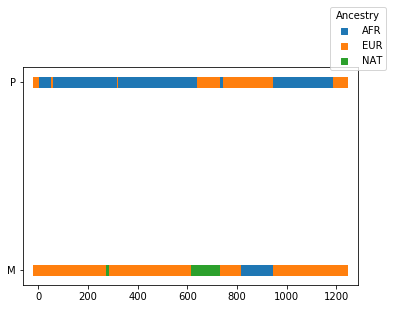

Original (LAI) (99.22% accuracy):


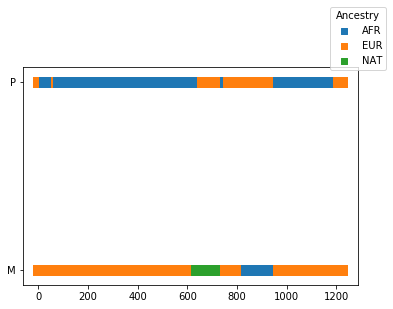

Beagle (LAI):


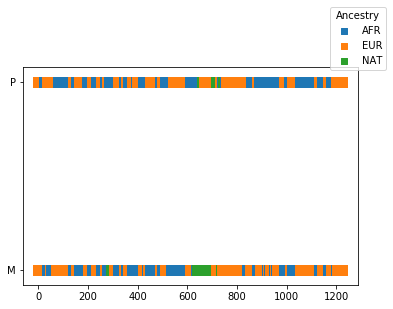

iteration 19/100
converged, stopping..
runtime: 10.0


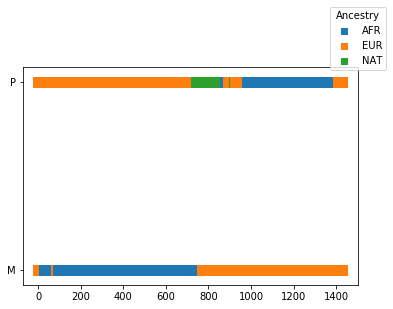

RFMix solution (LAI):


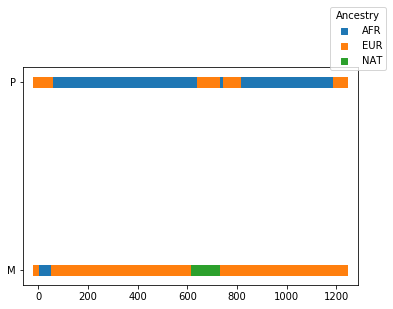

Haplotypes (true labels):


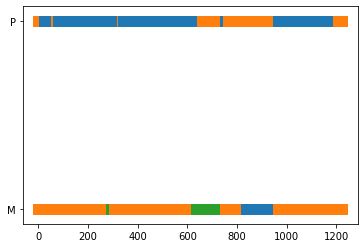

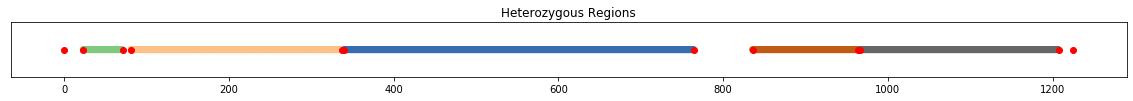

Measuring
--------------------------------------------------
Beagle
region  23 : 0.4205607476635514
region  81 : 0.5151282051282051
region  340 : 0.517948717948718
region  836 : 0.49446366782006923
region  966 : 0.5094871794871795
--------------------------------------------------
XGFix
region  23 : 0.8635514018691589
region  81 : 0.9266666666666666
region  340 : 0.7930769230769231
region  836 : 0.7363321799307958
region  966 : 0.8625641025641025
--------------------------------------------------
RFMix
region  23 : 0.9598130841121495
region  81 : 0.9528205128205128
region  340 : 0.8561538461538462
region  836 : 0.7896193771626298
region  966 : 0.9194871794871795


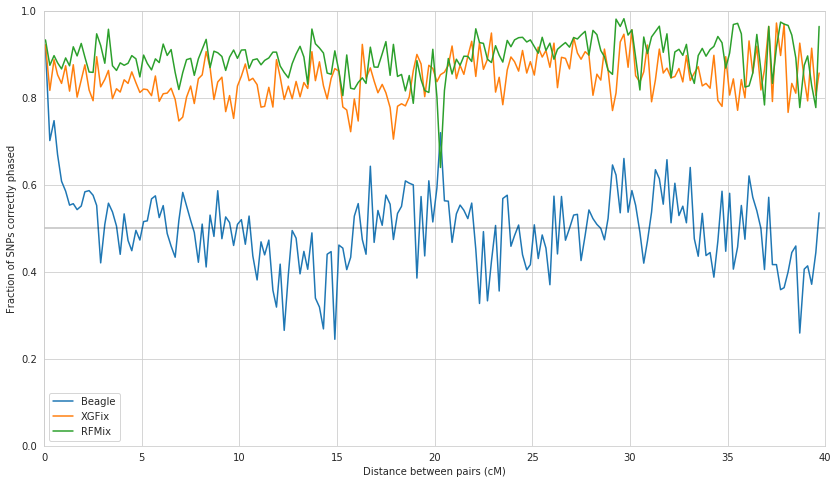

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

sample number.: 1
Original:


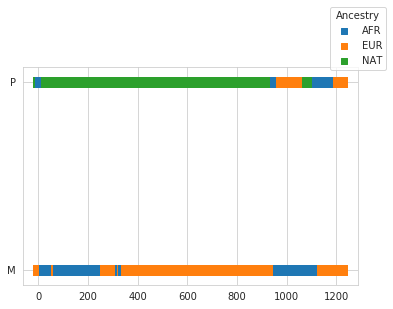

Original (LAI) (99.67% accuracy):


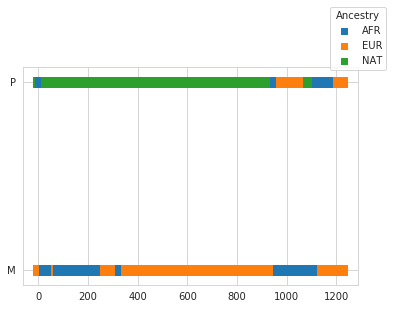

Beagle (LAI):


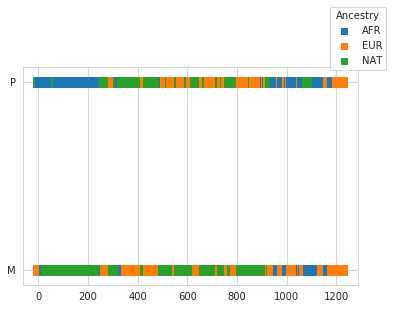

iteration 7/100
converged, stopping..
runtime: 3.0


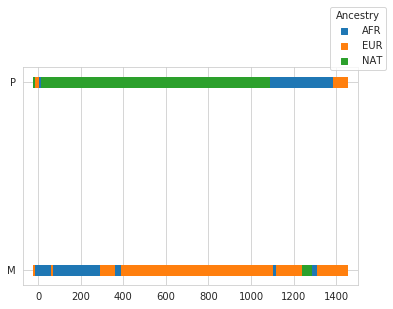

RFMix solution (LAI):


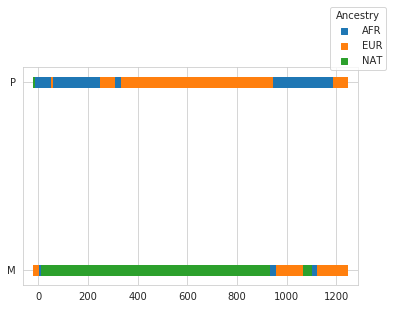

Haplotypes (true labels):


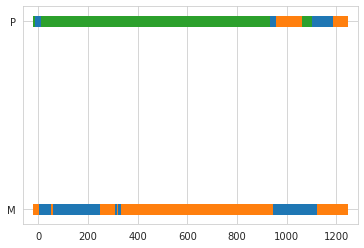

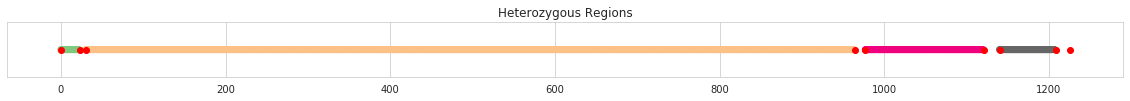

Measuring
--------------------------------------------------
Beagle
region  0 : 0.9156862745098039
region  30 : 0.5751282051282052
region  977 : 0.47791411042944787
region  1140 : 0.6019607843137255
--------------------------------------------------
XGFix
region  0 : 0.40980392156862744
region  30 : 0.8917948717948718
region  977 : 0.9496932515337423
region  1140 : 0.8248366013071895
--------------------------------------------------
RFMix
region  0 : 0.9235294117647059
region  30 : 0.9094871794871795
region  977 : 0.9288343558282208
region  1140 : 0.930718954248366


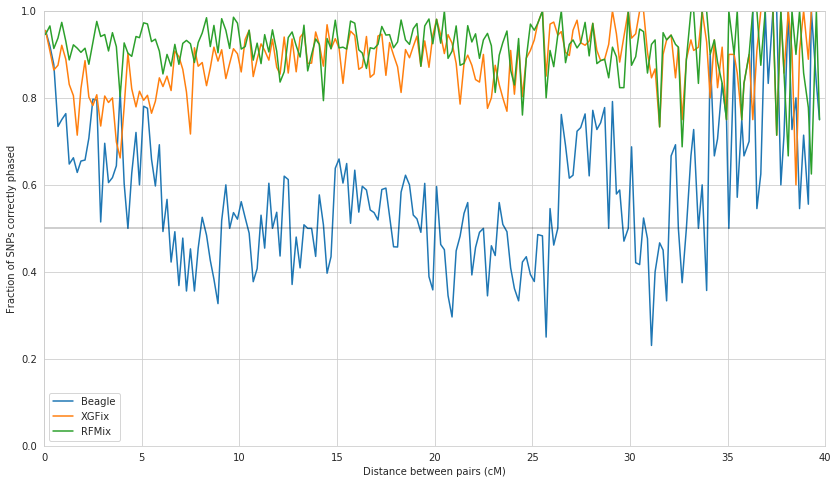

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

sample number.: 2
Original:


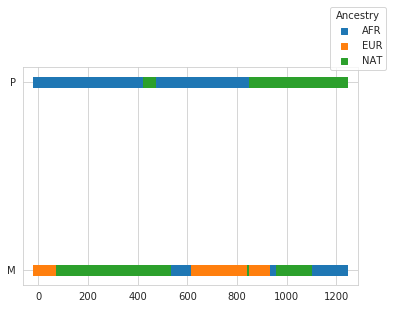

Original (LAI) (99.63% accuracy):


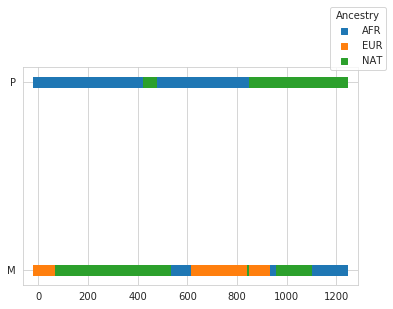

Beagle (LAI):


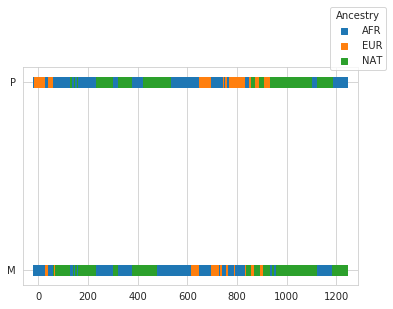

iteration 14/100
converged, stopping..
runtime: 6.0


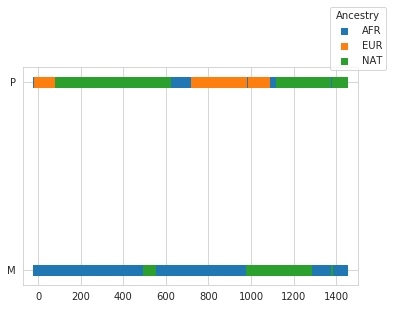

RFMix solution (LAI):


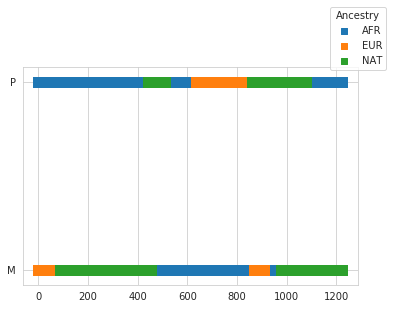

Haplotypes (true labels):


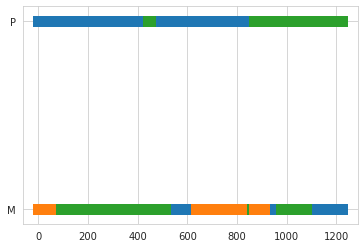

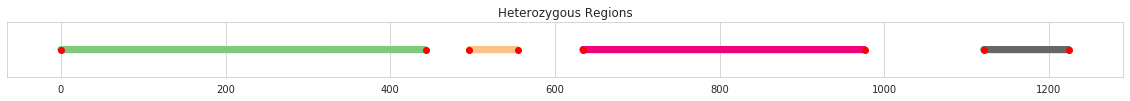

Measuring
--------------------------------------------------
Beagle
region  0 : 0.4807692307692308
region  496 : 1.0
region  634 : 0.5012820512820513
region  1121 : 0.5476595744680851
--------------------------------------------------
XGFix
region  0 : 0.9484615384615385
region  496 : 1.0
region  634 : 0.75
region  1121 : 0.8472340425531915
--------------------------------------------------
RFMix
region  0 : 0.9682051282051282
region  496 : 1.0
region  634 : 0.627948717948718
region  1121 : 0.9693617021276596


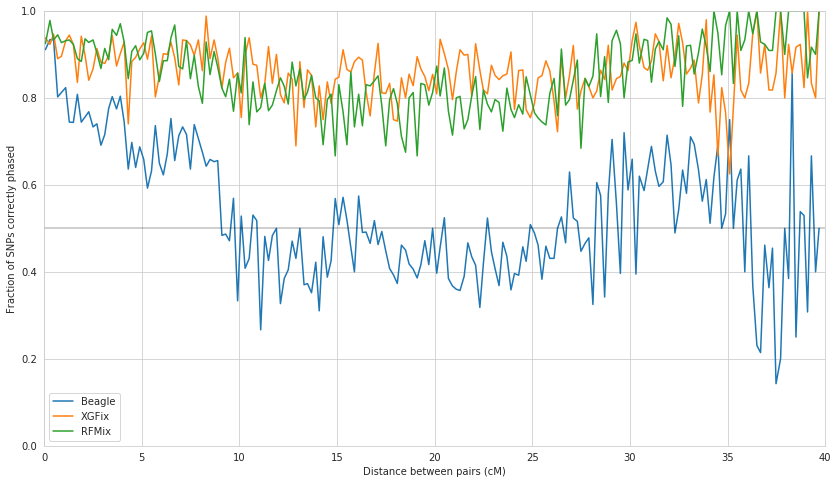

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

sample number.: 3
Original:


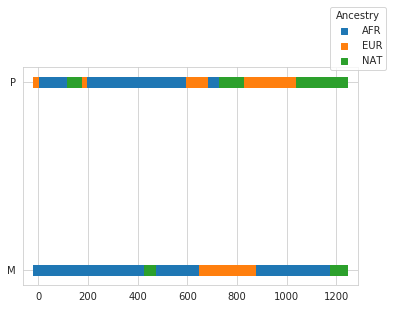

Original (LAI) (99.47% accuracy):


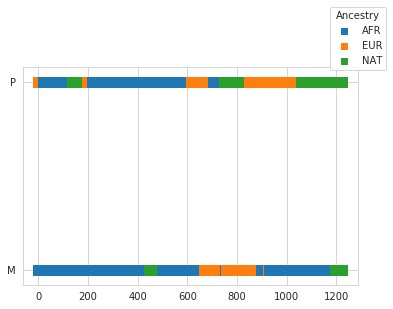

Beagle (LAI):


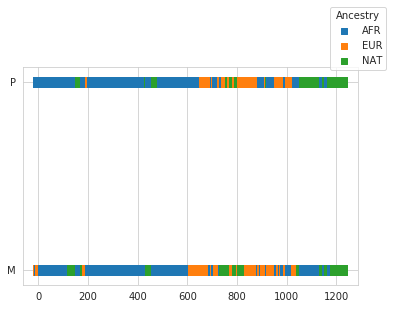

iteration 18/100
converged, stopping..
runtime: 10.0


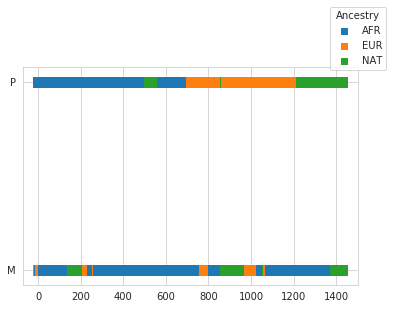

RFMix solution (LAI):


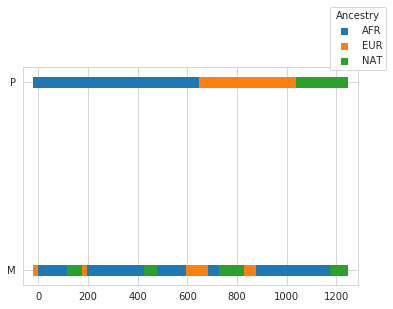

Haplotypes (true labels):


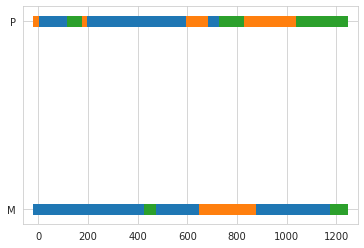

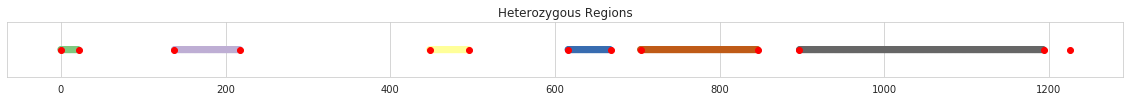

Measuring
--------------------------------------------------
Beagle
region  0 : 0.7333333333333333
region  138 : 0.485
region  448 : 0.4588785046728972
region  616 : 0.6051282051282051
region  704 : 0.5441358024691358
region  897 : 0.5071794871794871
--------------------------------------------------
XGFix
region  0 : 0.7333333333333333
region  138 : 0.9388888888888889
region  448 : 0.9093457943925234
region  616 : 0.9555555555555556
region  704 : 0.7805555555555556
region  897 : 0.7669230769230769
--------------------------------------------------
RFMix
region  0 : 0.9104166666666667
region  138 : 0.9583333333333334
region  448 : 0.9233644859813084
region  616 : 0.9717948717948718
region  704 : 0.8296296296296296
region  897 : 0.8035897435897436


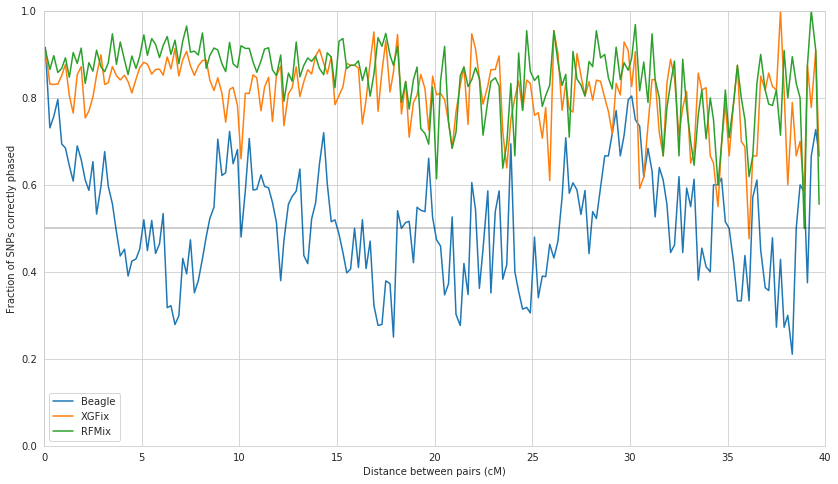

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------



In [12]:
from phasing import *
from simple_switch import *

D, C = [], []

MAX_DIST = 40
DIST_FREQ_IDX = 650

max_slack = 20
naive_lab = "Naive Switch (slack="+str(max_slack)+")"

scrambled_lab = "Beagle"
rfmix_lab = "RFMix"

model_cal = load_model(path_to_model, verbose=False)
model_cal.mode_filter_size = 0
model_cal.calibrate = True

path_to_model_w_20 = "../latino/models/model_w_small_chm_1/model_w_small_chm_1.pkl"
model_w_20 = load_model(path_to_model_w_20, verbose=False)
model_w_20.mode_filter_size = 0
model_w_20.calibrate = False

path_to_model_v2 = "../latino/models/model_chm_1/model_chm_1.pkl"
model_v2 = load_model(path_to_model_v2, verbose=False)
model_v2.mode_filter_size = 0
model_v2.calibrate = False

xgfix_lab = "XGFix"
labs = [scrambled_lab, xgfix_lab, rfmix_lab]

for s in range(4): 
    
    Ms = []
    dists = []
    corrs = []
    
    width=110
    print("-"*width+"\n"+"-"*width+"\n"+"-"*width+"\n")
    print("sample number.:", s)
    
    # Find sample ID, true haplotype snps and scrambled snps
    sample_id = test_ids[s]
    m_idx, p_idx = s*2, s*2+1
    M_true, P_true = np.copy(true_data[m_idx]), np.copy(true_data[p_idx])
    M_scrambled, P_scrambled = np.copy(scrambled_data[m_idx]), np.copy(scrambled_data[p_idx])
    Ms.append(M_scrambled)

    # original labels (in window space)
    M_original, P_original = true_labels_window[m_idx], true_labels_window[p_idx]
    print("Original:")
    plot_haplo(M_original, P_original, pop_order)
    plt.show()

    # original data classified by LAI (in window space)
    M_orig, P_orig = np.array(msp_df_true[sample_id + ".0"]), np.array(msp_df_true[sample_id + ".1"])
    acc = round(np.mean(np.concatenate([M_original == M_orig, P_original == P_orig]))*100,2)
    print("Original (LAI) ("+str(acc)+"% accuracy):")
    plot_haplo(M_orig, P_orig, pop_order)
    plt.show()

    # data containing phasing errors (in window space)
    M,P = np.array(msp_df_scrambled[sample_id + ".0"]), np.array(msp_df_scrambled[sample_id + ".1"])
    print("Beagle (LAI):")
    plot_haplo(M, P, pop_order)
    plt.show()
    
    # --------- XGFix ---------
    X_m, X_p, Y_m, Y_p, history, XGFix_tracker = XGFix(M_scrambled, P_scrambled, model_w_20, check_criterion="disc_base")
    M_corrected_XGFix, P_corrected_XGFix = X_m, X_p
    plot_haplo(Y_m, Y_p, pop_order); plt.show();
    Ms.append(M_corrected_XGFix)
    
    # --------- RFMix ---------
    M_corrected_rfmix, P_corrected_rfmix = rfmix_rephased[[m_idx, p_idx]]
    M_corrected_LAI_rfmix, P_corrected_LAI_rfmix = predict_haplo(M_corrected_rfmix,P_corrected_rfmix,path_to_model)
    print("RFMix solution (LAI):")
    plot_haplo(M_corrected_LAI_rfmix, P_corrected_LAI_rfmix, pop_order)
    plt.show()
    Ms.append(M_corrected_rfmix)
        
    # MEASURE THE CORRECTION 
    hetero_regions = find_hetero_regions(M_original, P_original)
    print("Measuring")
    for i_m, m in enumerate(Ms):
        print("-"*50)
        print(labs[i_m])
        d, c = evaluate_corretion(m, M_true, P_true, hetero_regions, true_vcf, gen_map_df, window_size, max_len_cM=MAX_DIST, dist_freq_idx=DIST_FREQ_IDX, verbose=False)
        dists.append(list(d))
        corrs.append(list(c))
   
    # visualize this individual:
    plot_matching_vs_dist3(dists, corrs, labs, n_bins=MAX_DIST*5, max_len_cM=MAX_DIST)
    width=110
    print("-"*width+"\n"+"-"*width+"\n"+"-"*width+"\n")
    
    D.append(list(dists))
    C.append(list(corrs))

# print("\n\n\nAccross All Individuals and regions:")
# plot_matching_vs_dist(DIST_SCRAM, CORR_SCRAM, DISTS_CORR, CORRS_CORR, 
#                       labs = [xgfix_lab, rfmix_lab, naive_lab],
#                       n_bins=MAX_DIST*10, max_len_cM=MAX_DIST)
                      


In [13]:
D_arr, C_arr = np.array(D), np.array(C)
D_total, C_total = [], []
for method in range(D_arr.shape[1]):
    D_total.append(np.concatenate(D_arr[:,method]))
    C_total.append(np.concatenate(C_arr[:,method]))
D_total, C_total = np.array(D_total), np.array(C_total)

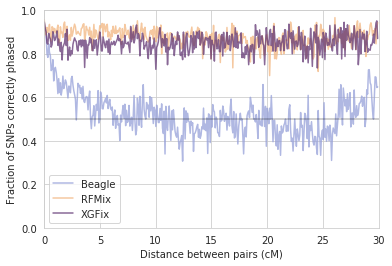

In [14]:
labs = [scrambled_lab, rfmix_lab, xgfix_lab]
colors = ["#96a0d9", "#f2b680", "#613673"]
plot_matching_vs_dist3(D_total[[0,-1,-2]], C_total[[0,-1,-2]], labs, colors=colors, figsize=None,
                       n_bins=MAX_DIST*10, max_len_cM=30, alpha=0.75)